# Restaurant Revenue Prediction

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
today = date.today()

In [3]:
X = X.iloc[:,1:]

The ID is unique for each entry and is of no use in the modelling, this is removed in the previous step.

In [4]:
X['Open Date'] = abs((pd.to_datetime(X['Open Date']) - pd.to_datetime('today').normalize()).dt.days)

The 'Open Date' has been replaced with the number of days

## Taking care of missing data

This section is not relevant in this case as the data is consistent

In [5]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

## Encoding categorical data

### Encoding the Independent Variables

In [6]:
X = pd.get_dummies(X)

get_dummies is used instead of OneHotEncoder to preserve the X as dataframe

In [7]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
#X = np.array(ct.fit_transform(X))

In [8]:
feature_list = list(X.columns)

feature_list contains all the headers (except revenue), it is going to prove useful later.

## Feature Scaling

In [9]:
sc = MinMaxScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)

## Splitting the dataset into the Training set and Test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
#X_train[:, :] = sc.fit_transform(X_train[:, :])
#X_test[:, :] = sc.transform(X_test[:, :])

# Training the Multiple Linear Regression model

In [12]:
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred1 = regressor1.predict(X_test)

In [14]:
sq_error1 = (y_test-y_pred1)**2

In [15]:
msq_error1 = sq_error1.mean()
msq_error1

4.106693938012625e+37

# Training the Polynomial Regression models

In [16]:
poly_reg2 = PolynomialFeatures(degree = 2)
X_poly2 = poly_reg2.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly2, y_train)

LinearRegression()

In [17]:
y_pred2 = lin_reg_2.predict(poly_reg2.fit_transform(X_test))

In [18]:
sq_error2 = (y_test-y_pred2)**2

In [19]:
msq_error2 = sq_error2.mean()
msq_error2

16758361641082.756

In [20]:
poly_reg3 = PolynomialFeatures(degree = 3)
X_poly3 = poly_reg3.fit_transform(X_train)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3, y_train)

LinearRegression()

In [21]:
y_pred3 = lin_reg_3.predict(poly_reg3.fit_transform(X_test))

In [22]:
sq_error3 = (y_test-y_pred3)**2

In [23]:
msq_error3 = sq_error3.mean()
msq_error3

16080248661776.527

In [24]:
poly_reg4 = PolynomialFeatures(degree = 4)
X_poly4 = poly_reg4.fit_transform(X_train)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly4, y_train)

LinearRegression()

In [25]:
y_pred4 = lin_reg_4.predict(poly_reg4.fit_transform(X_test))

In [26]:
sq_error4 = (y_test-y_pred4)**2

In [27]:
msq_error4 = sq_error4.mean()
msq_error4

16872909623521.588

# Training the Decision Tree Regression Model

In [28]:
regressor5 = DecisionTreeRegressor(random_state = 0)
regressor5.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
y_pred5 = regressor5.predict(X_test)

In [30]:
sq_error5 = (y_test-y_pred5)**2

In [31]:
msq_error5 = sq_error5.mean()
msq_error5

19305972133914.145

# Training the Random Forest Regression model

In [32]:
regressor6 = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor6.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [33]:
y_pred6 = regressor6.predict(X_test)

In [34]:
sq_error6 = (y_test-y_pred6)**2

In [35]:
msq_error6 = sq_error6.mean()
msq_error6

11621180207879.6

In [36]:
importances = list(regressor6.feature_importances_)
feature_importances = [(feature, round(importance, 6)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: P29                  Importance: 0.204539
Variable: Open Date            Importance: 0.118998
Variable: P17                  Importance: 0.090371
Variable: P2                   Importance: 0.057268
Variable: P20                  Importance: 0.050464
Variable: P28                  Importance: 0.04677
Variable: City_İstanbul        Importance: 0.045353
Variable: P23                  Importance: 0.041214
Variable: P1                   Importance: 0.03436
Variable: City_İzmir           Importance: 0.027561
Variable: P22                  Importance: 0.024295
Variable: P25                  Importance: 0.020342
Variable: P3                   Importance: 0.01882
Variable: P5                   Importance: 0.018266
Variable: P6                   Importance: 0.015931
Variable: P11                  Importance: 0.015571
Variable: P14                  Importance: 0.015154
Variable: P18                  Importance: 0.012491
Variable: P27                  Importance: 0.010591
Variable: P24  

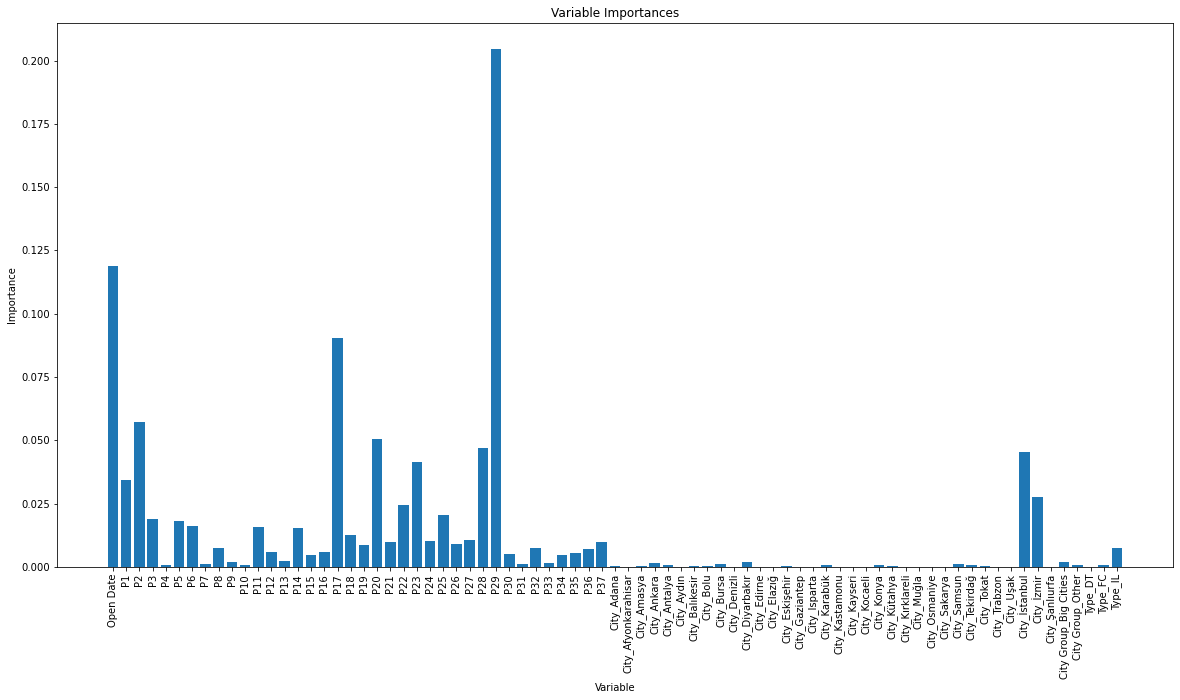

In [37]:
plt.rcParams["figure.figsize"] = (20,10)

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Training Random Forest Regression model with fewer variables

In [38]:
X_train_2 = X_train.iloc[:,[0,1,2,3,5,6,11,12,14,17,18,20,22,23,25,27,28,29,69,70]]

In [39]:
X_test_2 = X_test.iloc[:,[0,1,2,3,5,6,11,12,14,17,18,20,22,23,25,27,28,29,69,70]]

In [40]:
regressor7 = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor7.fit(X_train_2, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [41]:
y_pred7 = regressor7.predict(X_test_2)

In [42]:
sq_error7 = (y_test-y_pred7)**2

In [43]:
msq_error7 = sq_error7.mean()
msq_error7

11595846604771.215

## Training simple Linear Regression Models

In [44]:
regressor8 = LinearRegression()
regressor8.fit(X_train.iloc[:,29].values.reshape(-1,1), y_train)

LinearRegression()

In [45]:
y_pred8 = regressor8.predict(X_test.iloc[:,29].values.reshape(-1,1))

In [46]:
sq_error8 = (y_test-y_pred8)**2

In [47]:
msq_error8 = sq_error8.mean()
msq_error8

11669456766005.12

In [48]:
regressor9 = LinearRegression()
regressor9.fit(X_train.iloc[:,0].values.reshape(-1,1), y_train)

LinearRegression()

In [49]:
y_pred9 = regressor9.predict(X_test.iloc[:,0].values.reshape(-1,1))

In [50]:
sq_error9 = (y_test-y_pred9)**2

In [51]:
msq_error9 = sq_error9.mean()
msq_error9

9929444467578.576

In [52]:
regressor10 = LinearRegression()
regressor10.fit(X_train.iloc[:,17].values.reshape(-1,1), y_train)

LinearRegression()

In [53]:
y_pred10 = regressor10.predict(X_test.iloc[:,17].values.reshape(-1,1))

In [54]:
sq_error10 = (y_test-y_pred10)**2

In [55]:
msq_error10 = sq_error10.mean()
msq_error10

11977873395215.09